# Лабораторная работа - Линейное Программирование в Задачах Оптимизации

**Дата:** 4 декабря 2025 г.

**Выполнил**: Аннануров Даниил Петрович ИВТ 1.2 4 курс

## Цель работы
Освоить практические навыки формализации и решения задач линейного программирования с использованием Python.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog
from matplotlib.patches import FancyArrowPatch, Circle, Rectangle

## Задача 1: Оптимизация производства электроники (Бизнес)
Компания “ТехноПром” производит смартфоны и планшеты.
**Ресурсы:**
- Процессорное время: 240 ч. (2 ч/смартфон, 3 ч/планшет)
- Память: 480 ГБ (4 ГБ/смартфон, 6 ГБ/планшет)
- Аккумуляторы: 150 шт. (1 шт/смартфон, 2 шт/планшет)

**Прибыль:** 8000 руб/смартфон, 12000 руб/планшет.

In [6]:
# 1.1. Математическая модель и 1.3. Решение
# Максимизировать P = 8000*x1 + 12000*x2
# linprog минимизирует, поэтому минимизируем -P = -8000*x1 - 12000*x2

c = [-8000, -12000]

# Ограничения (A_ub @ x <= b_ub)
# 2*x1 + 3*x2 <= 240 (Процессор)
# 4*x1 + 6*x2 <= 480 (Память)
# 1*x1 + 2*x2 <= 150 (Аккумуляторы)

A_ub = [
    [2, 3],
    [4, 6],
    [1, 2]
]

b_ub = [240, 480, 150]

# Границы x1 >= 0, x2 >= 0
bounds = [(0, None), (0, None)]

# Решение
res_1 = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='highs')

print("=== Результаты Задачи 1 ===")
print(f"Статус: {res_1.message}")
print(f"Смартфонов (x1): {res_1.x[0]:.2f}")
print(f"Планшетов (x2): {res_1.x[1]:.2f}")
print(f"Максимальная прибыль: {-res_1.fun:.2f} руб.")

=== Результаты Задачи 1 ===
Статус: Optimization terminated successfully. (HiGHS Status 7: Optimal)
Смартфонов (x1): 30.00
Планшетов (x2): 60.00
Максимальная прибыль: 960000.00 руб.


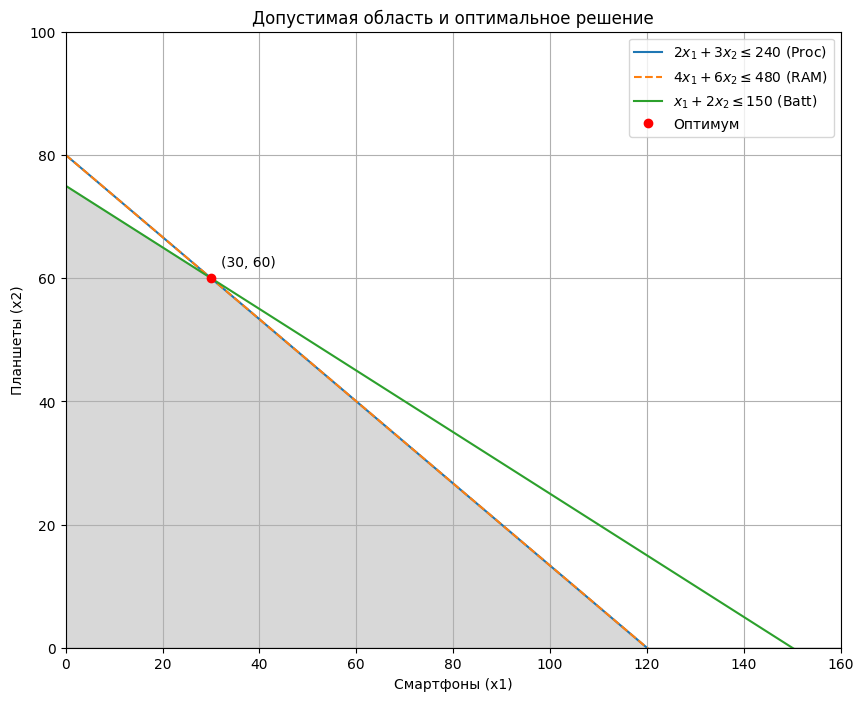

In [7]:
# 1.4. Геометрическая визуализация
x1_vals = np.linspace(0, 160, 400)

# Ограничения: x2 <= (b - a1*x1) / a2
# 2x1 + 3x2 <= 240 => x2 <= (240 - 2x1)/3
y1 = (240 - 2 * x1_vals) / 3
# 4x1 + 6x2 <= 480 => x2 <= (480 - 4x1)/6  (Это то же самое, что первое!)
y2 = (480 - 4 * x1_vals) / 6
# x1 + 2x2 <= 150 => x2 <= (150 - x1)/2
y3 = (150 - x1_vals) / 2

# Ограничение неотрицательности
y_zero = np.zeros_like(x1_vals)

plt.figure(figsize=(10, 8))
plt.plot(x1_vals, y1, label=r'$2x_1 + 3x_2 \leq 240$ (Proc)')
plt.plot(x1_vals, y2, '--', label=r'$4x_1 + 6x_2 \leq 480$ (RAM)')
plt.plot(x1_vals, y3, label=r'$x_1 + 2x_2 \leq 150$ (Batt)')

# Допустимая область (минимум из всех ограничений и >= 0)
y_min = np.minimum(np.minimum(y1, y2), y3)
y_feasible = np.maximum(y_min, y_zero)
plt.fill_between(x1_vals, y_zero, y_feasible, where=(y_feasible>=y_zero), color='gray', alpha=0.3)

# Оптимальная точка
plt.plot(res_1.x[0], res_1.x[1], 'ro', label='Оптимум')
plt.text(res_1.x[0]+2, res_1.x[1]+2, f'({res_1.x[0]:.0f}, {res_1.x[1]:.0f})')

plt.xlim(0, 160)
plt.ylim(0, 100)
plt.xlabel('Смартфоны (x1)')
plt.ylabel('Планшеты (x2)')
plt.title('Допустимая область и оптимальное решение')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# 1.5. Анализ ресурсов
print("Анализ использования ресурсов:")
resources = ['Процессорное время', 'Оперативная память', 'Аккумуляторы']
used = A_ub @ res_1.x
for i, r in enumerate(resources):
    slack = b_ub[i] - used[i]
    status = "Активное (дефицит)" if slack < 1e-5 else "Неактивное (избыток)"
    print(f"{r}: Использовано {used[i]:.1f}/{b_ub[i]}, Остаток {slack:.1f} -> {status}")

Анализ использования ресурсов:
Процессорное время: Использовано 240.0/240, Остаток 0.0 -> Активное (дефицит)
Оперативная память: Использовано 480.0/480, Остаток 0.0 -> Активное (дефицит)
Аккумуляторы: Использовано 150.0/150, Остаток 0.0 -> Активное (дефицит)


## Задача 2: Оптимизация снабжения военных баз (Транспортная задача)
Минимизировать транспортные расходы при перевозке МТО со складов на базы.
**Склады:** С1 (150), С2 (250). Всего 400.
**Базы:** Альфа (120), Бета (180), Гамма (100). Всего 400.
Задача сбалансирована.

In [9]:
# 2.1. Математическая модель и 2.4. Решение
# Переменные: x11, x12, x13, x21, x22, x23
# Стоимости
c_trans = [8, 6, 10, 9, 7, 5]

# Ограничения-равенства (A_eq @ x = b_eq)
# Склад 1: x11 + x12 + x13 = 150
# Склад 2: x21 + x22 + x23 = 250
# База А: x11 + x21 = 120
# База Б: x12 + x22 = 180
# База В: x13 + x23 = 100

A_eq = [
    [1, 1, 1, 0, 0, 0], # С1
    [0, 0, 0, 1, 1, 1], # С2
    [1, 0, 0, 1, 0, 0], # А
    [0, 1, 0, 0, 1, 0], # Б
    [0, 0, 1, 0, 0, 1]  # В
]

b_eq = [150, 250, 120, 180, 100]

bounds_trans = [(0, None)] * 6

res_2 = linprog(c_trans, A_eq=A_eq, b_eq=b_eq, bounds=bounds_trans, method='highs')

print("=== Результаты Задачи 2 ===")
print(f"Статус: {res_2.message}")
print(f"Минимальные расходы: {res_2.fun:.2f} усл. ед.")
print("План перевозок:")
routes = ['С1->А', 'С1->Б', 'С1->В', 'С2->А', 'С2->Б', 'С2->В']
for i, val in enumerate(res_2.x):
    if val > 0:
        print(f"{routes[i]}: {val:.1f} т")

=== Результаты Задачи 2 ===
Статус: Optimization terminated successfully. (HiGHS Status 7: Optimal)
Минимальные расходы: 2690.00 усл. ед.
План перевозок:
С1->Б: 150.0 т
С2->А: 120.0 т
С2->Б: 30.0 т
С2->В: 100.0 т


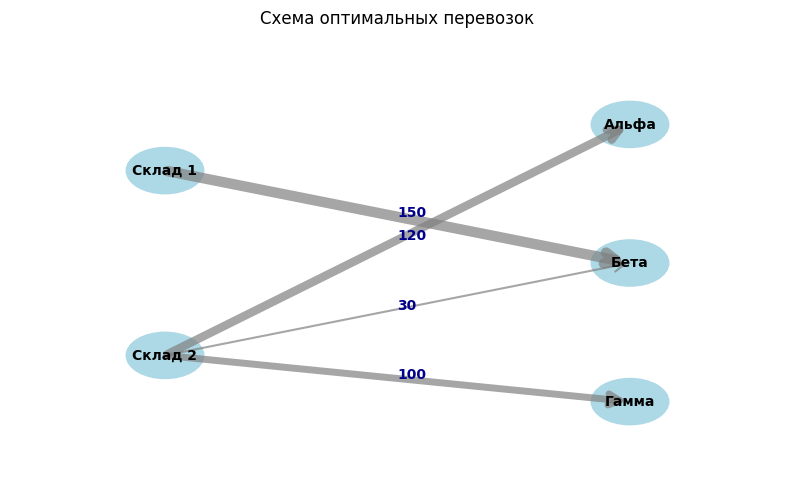

In [10]:
# 2.5. Визуализация сетевой диаграммы
fig, ax = plt.subplots(figsize=(10, 6))

# Координаты
pos = {
    'Склад 1': (0.2, 0.7), 'Склад 2': (0.2, 0.3),
    'Альфа': (0.8, 0.8), 'Бета': (0.8, 0.5), 'Гамма': (0.8, 0.2)
}

# Узлы
for name, (x, y) in pos.items():
    ax.add_patch(Circle((x, y), 0.05, color='lightblue'))
    ax.text(x, y, name, ha='center', va='center', fontweight='bold')

# Ребра (потоки)
flows = res_2.x
route_names = [('Склад 1', 'Альфа'), ('Склад 1', 'Бета'), ('Склад 1', 'Гамма'),
               ('Склад 2', 'Альфа'), ('Склад 2', 'Бета'), ('Склад 2', 'Гамма')]

for i, flow in enumerate(flows):
    if flow > 0:
        u, v = route_names[i]
        start = pos[u]
        end = pos[v]
        # Рисуем стрелку
        arrow = FancyArrowPatch(start, end, arrowstyle='->', mutation_scale=20, 
                                linewidth=flow/20, color='gray', alpha=0.7)
        ax.add_patch(arrow)
        # Подпись
        mid_x = (start[0] + end[0]) / 2
        mid_y = (start[1] + end[1]) / 2
        ax.text(mid_x, mid_y, f"{flow:.0f}", color='darkblue', fontweight='bold')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')
plt.title("Схема оптимальных перевозок")
plt.show()

In [11]:
# 2.6. Анализ результатов
print("Анализ плана:")
total_cost = res_2.fun
print(f"Общая стоимость: {total_cost}")
print("Проверка баланса:")
supply_used = sum(res_2.x[:3]) + sum(res_2.x[3:])
demand_met = (res_2.x[0]+res_2.x[3]) + (res_2.x[1]+res_2.x[4]) + (res_2.x[2]+res_2.x[5])
print(f"Вывезено со складов: {supply_used:.1f} (План: 400)")
print(f"Доставлено на базы: {demand_met:.1f} (План: 400)")

Анализ плана:
Общая стоимость: 2690.0
Проверка баланса:
Вывезено со складов: 400.0 (План: 400)
Доставлено на базы: 400.0 (План: 400)
